## Illia Tsuprun KA-14mp, IASA, KPI
## Course: decision making in hierarchical systems
## Tutor: N.Nedashkivska

# Analytic hierarchy process

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('python_modules') ## not my libraty, it was stolen. Author: N.Nedashkivska
import checkConsistencyPCM as pcmConsistencyChecker
import structureHierachy as hierBuilder
import calculationHierarchy as hierCalculator

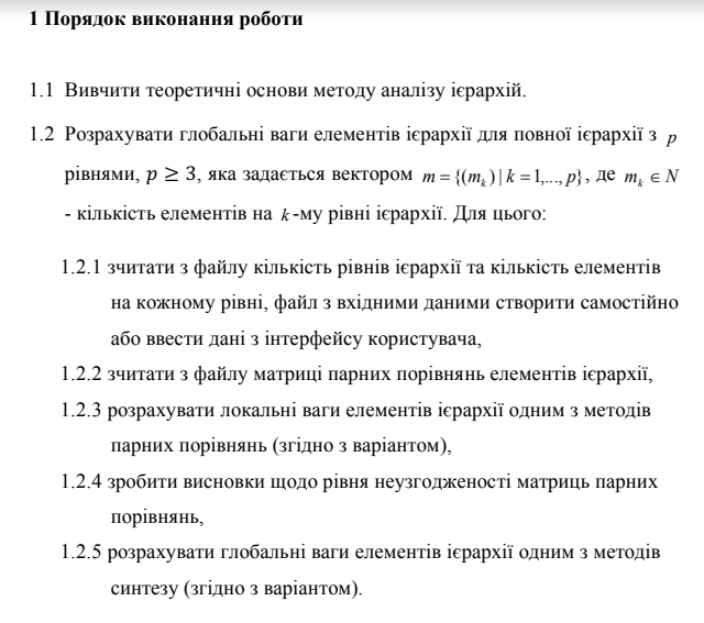

## Input:
- specify hierarchy structure as dict [level: n_elements]
- provide path to pairwise comparison matrices folder

In [2]:
# level : n_elements
hierStructure = {
    1: 4,
    2: 3,
    3: 3
}

## Read hierarchy structure, build complete hierarchy

In [3]:
def buildCompleteHierarchy(
    hierStructure: dict
) -> dict:
    hier: dict = hierBuilder.addRoot()
    rootId: str = sorted(hier)[0]
    currParents: list[str] = [rootId]

    for level, nElements in hierStructure.items():
        firstParentId: str = currParents[0]
        otherParents: list[str] = currParents[1:]
        k = 0
        while k < nElements:
            # полная иерархия, добавляем ребенка для первого родителя
            hierBuilder.addNewChildElem(hier, firstParentId)
            addedChildId: str = hier[firstParentId]['Childs'][-1]
            ## Соединеняем ребенка с остальными родителями
            for parentId in otherParents:
                hierBuilder.addNewLink(hier, parentId, addedChildId)
                print(f'{addedChildId} became a child of {parentId}')
            k += 1
        # родители для элементов на след уровне - елементы текущего уровня
        # т.е. - все дети одного (любого) из текущих родителей
        currParents: list[str] = hier[firstParentId]['Childs']
    return hier

In [4]:
hier = buildCompleteHierarchy(hierStructure)

New child elem is added:
{'E1_0': {'Name': 'Child No 0 of the E0_0', 'About': 'About E1_0', 'Childs': [], 'PCM': [], 'Parents': ['E0_0'], 'IdLevel': 1, 'LocalW': [], 'GlobW': None}}
New child elem is added:
{'E1_1': {'Name': 'Child No 1 of the E0_0', 'About': 'About E1_1', 'Childs': [], 'PCM': [], 'Parents': ['E0_0'], 'IdLevel': 1, 'LocalW': [], 'GlobW': None}}
New child elem is added:
{'E1_2': {'Name': 'Child No 2 of the E0_0', 'About': 'About E1_2', 'Childs': [], 'PCM': [], 'Parents': ['E0_0'], 'IdLevel': 1, 'LocalW': [], 'GlobW': None}}
New child elem is added:
{'E1_3': {'Name': 'Child No 3 of the E0_0', 'About': 'About E1_3', 'Childs': [], 'PCM': [], 'Parents': ['E0_0'], 'IdLevel': 1, 'LocalW': [], 'GlobW': None}}
New child elem is added:
{'E2_0': {'Name': 'Child No 0 of the E1_0', 'About': 'About E2_0', 'Childs': [], 'PCM': [], 'Parents': ['E1_0'], 'IdLevel': 2, 'LocalW': [], 'GlobW': None}}
E2_0 became a child of E1_1
E2_0 became a child of E1_2
E2_0 became a child of E1_3
New ch

In [5]:
hier

{'E0_0': {'Name': 'Root',
  'About': 'This is a main goal',
  'Childs': ['E1_0', 'E1_1', 'E1_2', 'E1_3'],
  'PCM': [],
  'Parents': [],
  'IdLevel': 0,
  'LocalW': [],
  'GlobW': 1},
 'E1_0': {'Name': 'Child No 0 of the E0_0',
  'About': 'About E1_0',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': [],
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E1_1': {'Name': 'Child No 1 of the E0_0',
  'About': 'About E1_1',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': [],
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E1_2': {'Name': 'Child No 2 of the E0_0',
  'About': 'About E1_2',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': [],
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E1_3': {'Name': 'Child No 3 of the E0_0',
  'About': 'About E1_3',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': [],
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E2_0': {'Name': 'Child No 0 of the E1_0',
 

## Read PCMs from file

In [8]:
def loadPCMs(hier):
    for key in hier:
        if len(hier[key]["Childs"]) > 0:
            pcm = np.loadtxt(f"./pcm/{key}.txt")
            hier[key]["PCM"] = pcm
    return hier

In [9]:
hier = loadPCMs(hier)
hier

{'E0_0': {'Name': 'Root',
  'About': 'This is a main goal',
  'Childs': ['E1_0', 'E1_1', 'E1_2', 'E1_3'],
  'PCM': array([[1.  , 4.  , 2.  , 5.  ],
         [0.25, 1.  , 0.25, 3.  ],
         [0.5 , 4.  , 1.  , 4.  ],
         [0.2 , 0.33, 0.25, 1.  ]]),
  'Parents': [],
  'IdLevel': 0,
  'LocalW': [],
  'GlobW': 1},
 'E1_0': {'Name': 'Child No 0 of the E0_0',
  'About': 'About E1_0',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 3.  ],
         [0.2 , 0.33, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E1_1': {'Name': 'Child No 1 of the E0_0',
  'About': 'About E1_1',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 4.  ],
         [0.2 , 0.25, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [],
  'GlobW': None},
 'E1_2': {'Name': 'Child No 2 of the E0_0',
  'About': 'About E1_2',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  ,

## Local weights calculation for hierarchy elements (EM - Eigenvector method)
## EM method. The vector of weights is the eigenvector of MPC corresponding toit largest eigenvalue.
## Make conclusions about matrices consistency
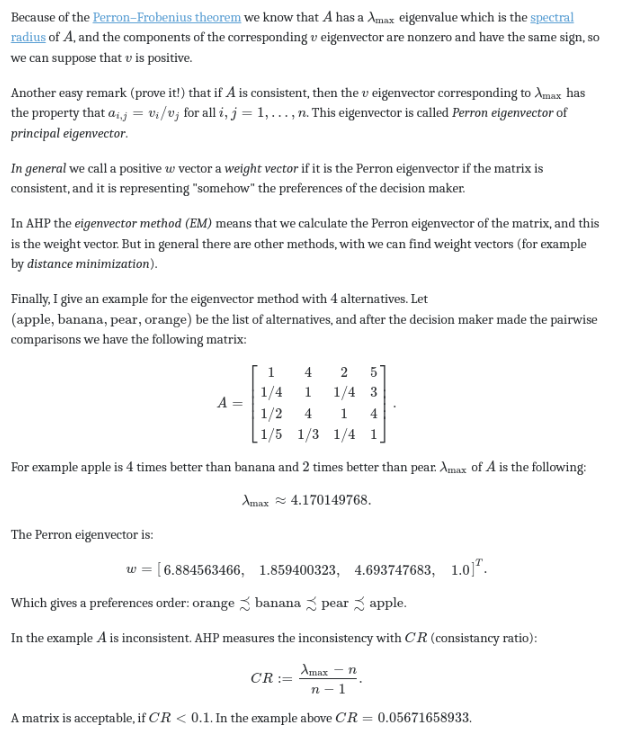

In [10]:
hier = hierCalculator.findAllLocalWs(hier,'EM')

Weight vector of child elements of the element E0_0, method EM
[0.4769281977222564, 0.12877000773470162, 0.3251341861475277, 0.06916760839551428]
Weight vector of child elements of the element E1_0, method EM
[0.5817782074588945, 0.3090766052094927, 0.1091451873316128]
Weight vector of child elements of the element E1_1, method EM
[0.5695405794554973, 0.33306935139198174, 0.09739006915252091]
Weight vector of child elements of the element E1_2, method EM
[0.5817782074588945, 0.3090766052094927, 0.1091451873316128]
Weight vector of child elements of the element E1_3, method EM
[0.6487759363971132, 0.22910427357098004, 0.12211979003190675]
Weight vector of child elements of the element E2_0, method EM
[0.5817782074588945, 0.3090766052094927, 0.1091451873316128]
Weight vector of child elements of the element E2_1, method EM
[0.6487759363971132, 0.22910427357098004, 0.12211979003190675]
Weight vector of child elements of the element E2_2, method EM
[0.5695405794554973, 0.33306935139198174,

In [11]:
hier 

{'E0_0': {'Name': 'Root',
  'About': 'This is a main goal',
  'Childs': ['E1_0', 'E1_1', 'E1_2', 'E1_3'],
  'PCM': array([[1.  , 4.  , 2.  , 5.  ],
         [0.25, 1.  , 0.25, 3.  ],
         [0.5 , 4.  , 1.  , 4.  ],
         [0.2 , 0.33, 0.25, 1.  ]]),
  'Parents': [],
  'IdLevel': 0,
  'LocalW': [0.4769281977222564,
   0.12877000773470162,
   0.3251341861475277,
   0.06916760839551428],
  'GlobW': 1},
 'E1_0': {'Name': 'Child No 0 of the E0_0',
  'About': 'About E1_0',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 3.  ],
         [0.2 , 0.33, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [0.5817782074588945, 0.3090766052094927, 0.1091451873316128],
  'GlobW': None},
 'E1_1': {'Name': 'Child No 1 of the E0_0',
  'About': 'About E1_1',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 4.  ],
         [0.2 , 0.25, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [0.5

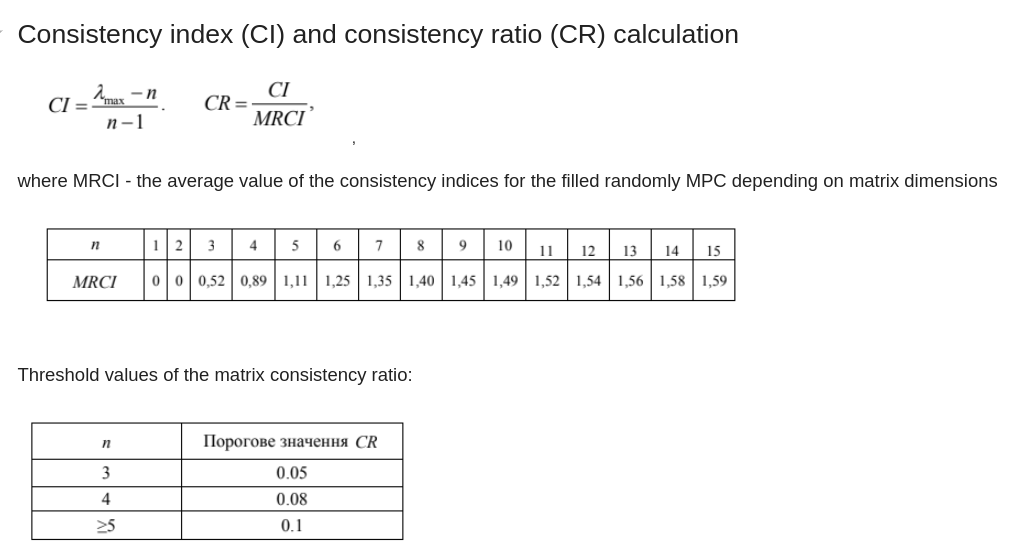

In [12]:
for key in hier:
    if len(hier[key]['Childs']) > 0:
        print(key)
        pcm = hier[key]['PCM']
        print('PCM is consistent: ', pcmConsistencyChecker.isConsist(pcm))
        print('PCM is weak consistent: ', pcmConsistencyChecker.isWeakConsist(pcm))
        print('PCM is consistent according CR index: ', pcmConsistencyChecker.isConsistCR(pcm))
        print('PCM is consistent according to GCI index: ', pcmConsistencyChecker.isConsistGCI(pcm))
        print('PCM is consistent according to HCR index: ', pcmConsistencyChecker.isConsistHCR(pcm))

E0_0
PCM is consistent:  False
PCM is weak consistent:  True
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  True
PCM is consistent according to HCR index:  True
E1_0
PCM is consistent:  False
PCM is weak consistent:  True
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  True
PCM is consistent according to HCR index:  True
E1_1
PCM is consistent:  False
PCM is weak consistent:  True
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  True
PCM is consistent according to HCR index:  True
E1_2
PCM is consistent:  False
PCM is weak consistent:  True
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  True
PCM is consistent according to HCR index:  True
E1_3
PCM is consistent:  False
PCM is weak consistent:  True
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  True
PCM is consistent according to HCR index:  

### Conclusion: 
### These PCMs are not theoretical, but experimental. The transitivity condition is not satisfied for all of them, so they are inconsistent. 
### However, these matrices have a sufficient level of consistency according to the CR criterion. That is, the CR value does not exceed the set threshold and all matrices can be used in local weights calculation. 

### These matrices are weakly consistent.

## Find global weights

In [13]:
hier = hierCalculator.findAllGlobalWs(hier, 'Ideal')

The hierarchy has 4 levels
The hierarchy has 4 levels


In [14]:
hier

{'E0_0': {'Name': 'Root',
  'About': 'This is a main goal',
  'Childs': ['E1_0', 'E1_1', 'E1_2', 'E1_3'],
  'PCM': array([[1.  , 4.  , 2.  , 5.  ],
         [0.25, 1.  , 0.25, 3.  ],
         [0.5 , 4.  , 1.  , 4.  ],
         [0.2 , 0.33, 0.25, 1.  ]]),
  'Parents': [],
  'IdLevel': 0,
  'LocalW': [0.4769281977222564,
   0.12877000773470162,
   0.3251341861475277,
   0.06916760839551428],
  'GlobW': 1},
 'E1_0': {'Name': 'Child No 0 of the E0_0',
  'About': 'About E1_0',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 3.  ],
         [0.2 , 0.33, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [0.5817782074588945, 0.3090766052094927, 0.1091451873316128],
  'GlobW': 1.0},
 'E1_1': {'Name': 'Child No 1 of the E0_0',
  'About': 'About E1_1',
  'Childs': ['E2_0', 'E2_1', 'E2_2'],
  'PCM': array([[1.  , 2.  , 5.  ],
         [0.5 , 1.  , 4.  ],
         [0.2 , 0.25, 1.  ]]),
  'Parents': ['E0_0'],
  'IdLevel': 1,
  'LocalW': [0.56

## Conclution: 
### Alternative E3_0 (first) is the most attractive after calculating the global weights. Its weight is about 0.6. 
### The worst is alternative E3_2 with a weight of 0.11